Saved shuffled image to TA_ALI8X8.png


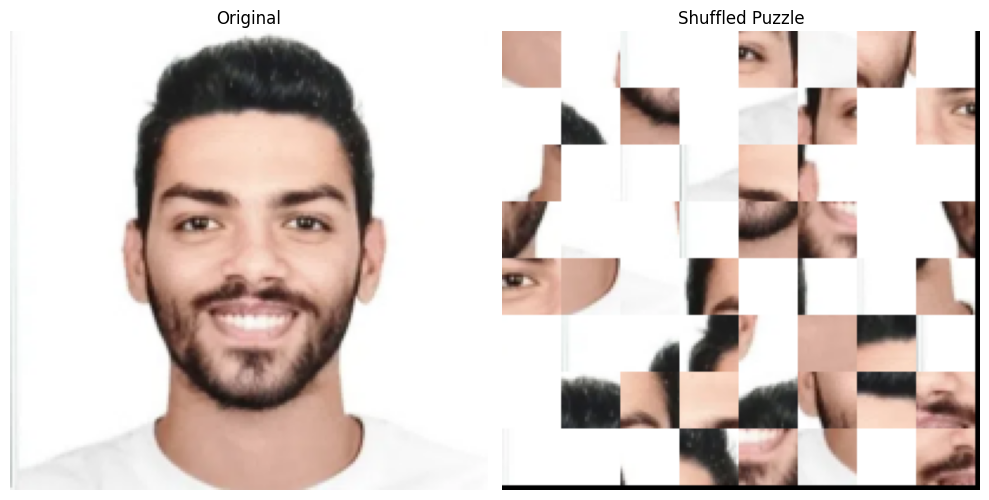

In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import random

# Load the image
image_path = 'TA_ALI.png'

if not os.path.exists(image_path):
    print(f"Image {image_path} not found. Please make sure it exists.")
else:
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Get dimensions
    h, w, _ = img.shape
    
    # Calculate piece size for 4x4 (16 parts)
    n_rows, n_cols = 8, 8
    piece_h = h // n_rows
    piece_w = w // n_cols
    
    pieces = []
    for r in range(n_rows):
        for c in range(n_cols):
            y = r * piece_h
            x = c * piece_w
            piece = img[y:y+piece_h, x:x+piece_w]
            pieces.append(piece)
            
    # Shuffle pieces
    random.shuffle(pieces)
    
    # Reconstruct shuffled image
    shuffled_img = np.zeros_like(img)
    for i, piece in enumerate(pieces):
        r = i // n_cols
        c = i % n_cols
        y = r * piece_h
        x = c * piece_w
        shuffled_img[y:y+piece_h, x:x+piece_w] = piece
        
    # Save shuffled image
    save_path = 'TA_ALI8X8.png'
    # Convert back to BGR for saving with OpenCV
    cv2.imwrite(save_path, cv2.cvtColor(shuffled_img, cv2.COLOR_RGB2BGR))
    print(f"Saved shuffled image to {save_path}")

    # Display
    plt.figure(figsize=(10, 5))
    
    # Original
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Original")
    plt.axis('off')
    
    # Shuffled
    plt.subplot(1, 2, 2)
    plt.imshow(shuffled_img)
    plt.title("Shuffled Puzzle")
    plt.axis('off')
        
    plt.tight_layout()
    plt.show()